# 1. **Movie Insights: Exploring Box Office Performance and Ratings**

### a) Introduction 
Microsoft is a multinational technology company known for its wide range of software, hardware, and services. Founded in 1975 by Bill Gates and Paul Allen, Microsoft has played a pivotal role in shaping the digital landscape and revolutionizing the way people interact with technology. With iconic products such as Windows, Office, and Xbox, Microsoft has established itself as a global leader in the technology industry. The company's mission is to empower individuals and organizations worldwide to achieve more through the power of innovative technology solutions. Microsoft's commitment to innovation, coupled with its strong focus on cloud computing, artificial intelligence, and digital transformation, has positioned it as a key player in the modern digital era. Continually striving to push the boundaries of what is possible, Microsoft remains at the forefront of technological advancements, driving innovation and transforming industries across the globe.

In an effort to expand its business portfolio, Microsoft is venturing into the movie industry by establishing a new movie studio. However, to navigate this highly competitive industry and maximize their chances of success, Microsoft needs a comprehensive understanding of the types of films that resonate with audiences and perform well at the box office. This project aims to address this knowledge gap by conducting an in-depth analysis of data from various authoritative sources in the movie industry, including Box Office Mojo, IMDB, Rotten Tomatoes, TheMovieDB, and The Numbers. By leveraging this data, the project seeks to identify successful film genres and provide actionable insights that can guide Microsoft's decision-making process when it comes to selecting the types of films to produce

### b) Problem Statement

Microsoft's lack of knowledge about the current landscape of successful films at the box office presents a significant challenge. Without a clear understanding of which film genres are performing well and resonating with audiences, Microsoft's movie studio is at a disadvantage when it comes to making strategic decisions about the types of films they should produce. This knowledge gap hampers their ability to allocate resources effectively and increases the risk of producing films that may not resonate with audiences or generate significant revenue. Therefore, the primary objective of this project is to analyze the available data from reputable sources and identify the film genres that exhibit strong financial performance. By doing so, Microsoft can make informed choices about the types of films to produce and increase their chances of success in the highly competitive movie industry.

### c) Main Objective

To provide valuable insights to Microsoft's new movie studio by analyzing the current trends and performance of different film genres at the box office. By identifying successful genres, the project aims to guide Microsoft in making informed decisions about the types of films to produce


### d) Specific Objectives

#### Objective 1: Analyze Box Office Performance
Explore "tn.movie_budgets.csv" file to analyze the box office performance of different films.
Examine the domestic and international gross earnings, budgets, and release dates of movies.
Identify the highest-grossing films and compare their performance across genres.
Determine genres that consistently perform well at the box office and have a higher likelihood of financial success.

#### Objective 2: Evaluate Audience Ratings
Utilize the "title.ratings.csv" file to analyze audience ratings of films.
Examine ratings and reviews from platforms like IMDb and Rotten Tomatoes.
Identify genres that receive positive audience feedback and have a higher likelihood of success based on ratings.
Consider viewers' opinions and preferences to guide genre selection and increase the chances of audience appeal.

#### Objective 3: Assess Genre Popularity and Trends
Analyze the genre distribution in the "tmdb.movies.csv" file to understand the popularity of different genres among filmmakers and audiences.
Examine the frequency and distribution of genres to identify those currently in high demand and with a larger market share.
Explore temporal trends to identify emerging or declining genres in the movie industry.
Gain insights into the preferences of filmmakers and audiences to inform genre selection and capitalize on market trends.

#### Objective 4: Analyze Market Share and Competition
Utilize the "bom.movie_gross.csv" file to gather data on movie gross earnings and market share.
Analyze the performance of films from different studios and production companies.
Identify the market share of different studios and successful competitors within specific genres.

### f) Data Understanding 
The movie data used in this project was obtained from [source]. It consists of a dataset called "movie_budgets" with information on various movies including their production budgets, domestic and worldwide gross earnings, and release dates.

The "movie_budgets" dataset contains [number of rows] rows and [number of columns] columns, with the following information:
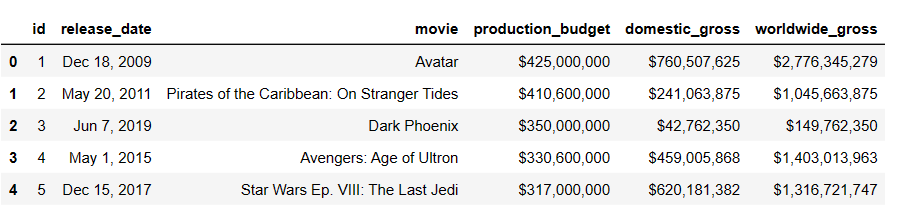

In addition to the "movie_budgets" dataset, no other external datasets were used in this project. The focus was primarily on analyzing the relationships between movie budgets, earnings, and release dates.


# 2. **Importing Libraries**

In [1]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime
import pickle
import calendar
import ast
import requests

warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.2f}'.format

# 3. **Reading Data**

In [2]:
movie_gross=pd.read_csv('bom.movie_gross.csv')
movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.00,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.00,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.00,664300000,2010
3,Inception,WB,292600000.00,535700000,2010
4,Shrek Forever After,P/DW,238700000.00,513900000,2010


In [3]:
movie_rating=pd.read_csv('title.ratings.csv')
movie_rating.head()


,tconst,averagerating,numvotes
0,tt10356526,8.30,31
1,tt10384606,8.90,559
2,tt1042974,6.40,20
3,tt1043726,4.20,50352
4,tt1060240,6.50,21


In [4]:
movie_rating.shape

(73856, 3)

In [5]:
genre_popularity=pd.read_csv("tmdb.movies.csv")
genre_popularity.head(10)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.53,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.70,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.73,2010-03-26,How to Train Your Dragon,7.70,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.52,2010-05-07,Iron Man 2,6.80,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.00,1995-11-22,Toy Story,7.90,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.92,2010-07-16,Inception,8.30,22186
5,5,"[12, 14, 10751]",32657,en,Percy Jackson & the Olympians: The Lightning T...,26.69,2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.10,4229
6,6,"[28, 12, 14, 878]",19995,en,Avatar,26.53,2009-12-18,Avatar,7.40,18676
7,7,"[16, 10751, 35]",10193,en,Toy Story 3,24.45,2010-06-17,Toy Story 3,7.70,8340
8,8,"[16, 10751, 35]",20352,en,Despicable Me,23.67,2010-07-09,Despicable Me,7.20,10057
9,9,"[16, 28, 35, 10751, 878]",38055,en,Megamind,22.86,2010-11-04,Megamind,6.80,3635


In [6]:
movie_budgets=pd.read_csv("tn.movie_budgets.csv")
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [7]:
movies_data = pd.read_csv("tmdb.movies.csv")
movies_data.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.53,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.70,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.73,2010-03-26,How to Train Your Dragon,7.70,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.52,2010-05-07,Iron Man 2,6.80,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.00,1995-11-22,Toy Story,7.90,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.92,2010-07-16,Inception,8.30,22186


# Exploring and Preprocessing Data

In [8]:
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [9]:
movie_budgets.shape

(5782, 6)

In [ ]:
duplicate_rows = movie_budgets.duplicated()

# Displaying the duplicate rows
duplicates = movie_budgets[duplicate_rows]
print("Duplicate rows:")

In [ ]:
# Convert the domestic_gross, worldwide_gross, and production_budget columns to numeric
movie_budgets["domestic_gross"] = pd.to_numeric(movie_budgets["domestic_gross"].str.replace(",", "").str.replace("$", ""))
movie_budgets["worldwide_gross"] = pd.to_numeric(movie_budgets["worldwide_gross"].str.replace(",", "").str.replace("$", ""))
movie_budgets["production_budget"] = pd.to_numeric(movie_budgets["production_budget"].str.replace(",", "").str.replace("$", ""))


In [ ]:
movies_data.info()

In [ ]:
movies_data.shape

In [ ]:
subset_columns = ["id"]
movies_data.drop_duplicates(subset=subset_columns, inplace=True)


In [ ]:
# Define your TMDb API key
api_key = "cffa5c12fc10e5e1381fc438f7061c68"

# Fetch the genre data from TMDb API
genre_url = f"https://api.themoviedb.org/3/genre/movie/list?api_key={api_key}"
response = requests.get(genre_url)
genre_data = response.json()

# Create a dictionary to map genre IDs to genre names
genre_dict = {genre['id']: genre['name'] for genre in genre_data['genres']}

# Read the movies data from CSV
movies_data = pd.read_csv("tmdb.movies.csv")

# Function to map genre IDs to genre names
def map_genre_ids_to_names(genre_ids):
    genre_ids = ast.literal_eval(genre_ids)  # Convert string representation to actual list
    genre_names = [genre_dict.get(genre_id) for genre_id in genre_ids if genre_id in genre_dict]
    return genre_names

# Map the 'genre_ids' column to genre names
movies_data['genre_names'] = movies_data['genre_ids'].apply(map_genre_ids_to_names)

# Display the updated DataFrame
movies_data.head()

In [ ]:
genre_popularity.info(10)

In [ ]:
subset_columns = ["id"]
genre_popularity.drop_duplicates(subset=subset_columns, inplace=True)


In [ ]:
# Merge the genre_popularity and movie_budgets DataFrames on the movie title or id column
merged_data = pd.merge(genre_popularity, movie_budgets, left_on="title", right_on="movie")
merged_data.head()

In [ ]:
# Function to map genre IDs to genre names in the merged data frame
def map_genre_ids_to_names(genre_ids):
    genre_ids = ast.literal_eval(genre_ids)  # Convert string representation to actual list
    genre_names = [genre_dict.get(genre_id) for genre_id in genre_ids if genre_id in genre_dict]
    return genre_names

# Map the 'genre_ids' column to genre names
merged_data['genre_names'] = merged_data['genre_ids'].apply(map_genre_ids_to_names)

# Display the updated DataFrame
merged_data.head()


In [ ]:
merged_data = merged_data.drop(["Unnamed: 0", "id_y", "original_language", "original_title", "release_date_y","movie"], axis=1)
merged_data.head()

# Data Analysis

# Objetive 1

In [ ]:
#Analyze the domestic and international gross earnings, budgets, and release dates

# Calculate the total gross earnings (domestic + worldwide)
merged_data["total_gross"] = merged_data["domestic_gross"] + merged_data["worldwide_gross"]

# Group the data by genre and calculate the average total gross for each genre
genre_performance = merged_data.explode("genre_names").groupby("genre_names")["total_gross"].mean().reset_index()

# Sort the genres by average total gross in descending order
genre_performance = genre_performance.sort_values(by="total_gross", ascending=False)

In [ ]:
# Genres with the highest average total gross
top_performing_genres = genre_performance.head(10)
top_performing_genres.head(10)


In [ ]:
# Set the plot style
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x="total_gross", y="genre_names", data=top_performing_genres, orient="h")
plt.xlabel("Average Total Gross (in billions)")
plt.ylabel("Genre")
plt.title("Top Performing Genres at the Box Office")
plt.show()


# Objective 3

In [ ]:
movie_budgets['domestic_gross'] = movie_budgets['domestic_gross'].astype(float)
movie_budgets['worldwide_gross'] = movie_budgets['worldwide_gross'].astype(float)
movie_budgets['total_gross'] = movie_budgets['domestic_gross'] + movie_budgets['worldwide_gross']
movie_budgets['ROI'] = movie_budgets['total_gross'] / movie_budgets['production_budget']

movie_budgets['ROI'].head()

In [ ]:
top_10_movies = movie_budgets.sort_values('ROI', ascending=False).head(10)


In [ ]:
top_10_movies['movie']


In [ ]:
bottom_10_movies = movie_budgets.sort_values('ROI', ascending=True).head(10)


In [ ]:
bottom_10_movies['movie']


In [ ]:
# Convert 'release_date' column to datetime
movie_budgets['release_date'] = pd.to_datetime(movie_budgets['release_date'])

# Group the movies by year and count the number of successful movie releases per year
release_year_counts = movie_budgets[movie_budgets['ROI'] > 1].groupby(movie_budgets['release_date'].dt.year).size()

plt.figure(figsize=(10, 6))
plt.plot(release_year_counts.index, release_year_counts.values)
plt.xlabel('Year')
plt.ylabel('Number of Successful Releases')
plt.title('Number of Successful Movie Releases per Year')
plt.show()


In [ ]:
# Group the movies by month and count the number of successful movie releases per month
release_month_counts = movie_budgets[movie_budgets['ROI'] > 1].groupby(movie_budgets['release_date'].dt.month).size()

month_names = [calendar.month_abbr[i] for i in release_month_counts.index]

plt.figure(figsize=(10, 6))
plt.bar(month_names, release_month_counts.values)
plt.xlabel('Month')
plt.ylabel('Number of Successful Releases')
plt.title('Number of Successful Movie Releases per Month')
plt.show()


# Objective 4

In [ ]:
# Sort the movies data by popularity in descending order
movies_data_sorted = movies_data.sort_values(by='popularity', ascending=False)

# Flatten the lists of genre names into a single string
movies_data_sorted['genre_names'] = movies_data_sorted['genre_names'].apply(lambda x: ', '.join(x))

# Get the top 10 genres with highest popularity
top_10_high_popularity = movies_data_sorted.head(10)

# Get the bottom 10 genres with lowest popularity
top_10_low_popularity = movies_data_sorted.tail(10)

# Create the bar plot for genres with highest popularity
plt.figure(figsize=(10, 6))
sns.barplot(x='popularity', y='genre_names', data=top_10_high_popularity, color='blue')
plt.title('Top 10 Genres with Highest Popularity')
plt.xlabel('Popularity')
plt.ylabel('Genre Names')
plt.show()

# Create the bar plot for genres with lowest popularity
plt.figure(figsize=(10, 6))
sns.barplot(x='popularity', y='genre_names', data=top_10_low_popularity, color='red')
plt.title('Genres with Lowest Popularity')
plt.xlabel('Popularity')
plt.ylabel('Genre Names')
plt.show()

# Objective 2

In [ ]:
movie_info = pd.read_csv('rt.movie_info.tsv', delimiter='\t')


In [ ]:
reviews = pd.read_csv('rt.reviews.tsv', delimiter='\t', encoding='latin-1')


In [ ]:
merged_data = pd.merge(movie_info, reviews, on='id')


In [ ]:
merged_data.tail()

In [ ]:
merged_data.shape

In [ ]:
merged_data.info()

In [ ]:
columns_to_drop = ["synopsis", "rating_x", "dvd_date", "currency", "box_office", "fresh", "critic", "top_critic", "publisher", "date"]
merged_data = merged_data.drop(columns=columns_to_drop)


In [ ]:
merged_data.head()

In [ ]:
merged_data.info()

In [ ]:
# Drop rows with no genre values
merged_data.dropna(subset=['genre'], inplace=True)

# Fill missing runtime values with the average runtime
average_runtime = merged_data['runtime'].astype(float).mean()
merged_data['runtime'].fillna(average_runtime, inplace=True)

# Drop rows with no rating_y values
merged_data.dropna(subset=['rating_y'], inplace=True)

# Drop rows with null studio values
merged_data.dropna(subset=['studio'], inplace=True)


In [ ]:
merged_data['runtime'] = merged_data['runtime'].apply(lambda x: str(x).split()[0] if pd.notnull(x) else x)
merged_data['runtime'] = merged_data['runtime'].astype(float)


In [ ]:
# Convert theater_date column to datetime
merged_data['theater_date'] = pd.to_datetime(merged_data['theater_date'])

# Convert runtime column to numeric (if possible)
merged_data['runtime'] = pd.to_numeric(merged_data['runtime'], errors='coerce')

# Convert rating_y column to numeric (if possible)
merged_data['rating_y'] = pd.to_numeric(merged_data['rating_y'], errors='coerce')


In [ ]:
import matplotlib.pyplot as plt

# Analyze the distribution of movie genres

genre_counts = merged_data['genre'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar')
plt.title('Top 10 Most Popular Movie Genres')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


# Explore the relationship between movie runtime and audience ratings

# Filter out rows with null values in 'runtime' and 'rating_y' columns
filtered_data = merged_data.dropna(subset=['runtime', 'rating_y'])

# Convert 'runtime' column to numeric
filtered_data['runtime'] = filtered_data['runtime'].apply(lambda x: float(x.split()[0]) if pd.notnull(x) else x)

# Plot scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['runtime'], filtered_data['rating_y'])
plt.title('Relationship between Movie Runtime and Audience Ratings')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Rating')
plt.show()

# Investigate the impact of studio on movie ratings
studio_ratings = merged_data.groupby('studio')['rating_y'].mean().dropna()
top_studios = studio_ratings.nlargest(10)
plt.figure(figsize=(10, 6))
top_studios.plot(kind='bar')
plt.title('Top 10 Studios with Highest Average Audience Rating')
plt.xlabel('Studio')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()


# Examine the release pattern of movies over time
merged_data['release_year'] = merged_data['theater_date'].dt.year
release_counts = merged_data['release_year'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
release_counts.plot(kind='line', marker='o')
plt.title('Number of Movies Released Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Movies Released')
plt.show()
